# Model 9

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve, roc_auc_score, roc_curve
import numpy as np

In [2]:
model_df = pd.read_csv("status.csv")
model_df.head()

,hypertension,heart_disease,diabetes,problematic,gender,smoking_history_No Info,smoking_history_current,smoking_history_not current,age,bmi,HbA1c_level,blood_glucose_level
0,0,1,0,0,0,0.0,0.0,1.0,1.000000,-0.645658,0.127273,-0.454545
1,0,0,0,0,0,1.0,0.0,0.0,0.349349,-0.595938,0.127273,-1.000000
2,0,0,0,0,1,0.0,0.0,1.0,-0.301301,-0.595938,-0.200000,-0.290909
3,0,0,0,0,0,0.0,1.0,0.0,-0.101101,-0.686275,-0.454545,-0.318182
4,1,1,0,0,1,0.0,1.0,0.0,0.899900,-0.763539,-0.527273,-0.318182


In [3]:
# Define features (X) and target (y)
X = model_df.drop("diabetes",axis=1)
y = model_df["diabetes"]

In [4]:
# Split dataset into train and test sets (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42)

In [5]:
# Build a neural network model 
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='tanh')) 
model.add(Dense(128, activation='tanh')) 
model.add(Dense(64, activation='tanh'))  
model.add(Dense(1, activation='sigmoid'))  

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])
model.summary()

# Train the model with early stopping to prevent overfitting
h = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=128,
    validation_data=(X_test, y_test),  
    callbacks=[EarlyStopping(monitor='val_loss', patience=15)]
)

/Users/durudemirbag/miniforge3/envs/tf/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-23 22:15:37.534074: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-08-23 22:15:37.534108: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-08-23 22:15:37.534117: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-08-23 22:15:37.534137: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-23 22:15:37.534148: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:27

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,369 (103.00 KB)

 Trainable params: 26,369 (103.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


2025-08-23 22:15:37.935183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


703/703 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9597 - loss: 0.1227 - val_accuracy: 0.9671 - val_loss: 0.0977
Epoch 2/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9671 - loss: 0.0982 - val_accuracy: 0.9725 - val_loss: 0.0895
Epoch 3/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9708 - loss: 0.0872 - val_accuracy: 0.9693 - val_loss: 0.0943
Epoch 4/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9709 - loss: 0.0858 - val_accuracy: 0.9731 - val_loss: 0.0824
Epoch 5/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9719 - loss: 0.0839 - val_accuracy: 0.9721 - val_loss: 0.0836
Epoch 6/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9707 - loss: 0.0840 - val_accuracy: 0.9736 - val_loss: 0.0800
Epoch 7/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9715 - loss: 0.0850 - val_accuracy: 0.9736 - val_loss: 0.0815
Epoch 8/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9725 - loss: 0.0826 - val_accuracy

In [6]:
# Plot training vs validation accuracy and loss across epochs
def LossHistory (history):
    # Accuracy 
    plt.figure(figsize=(8,4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Loss 
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

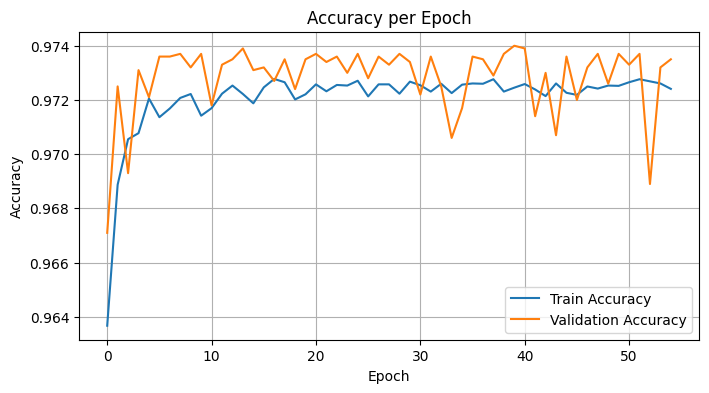

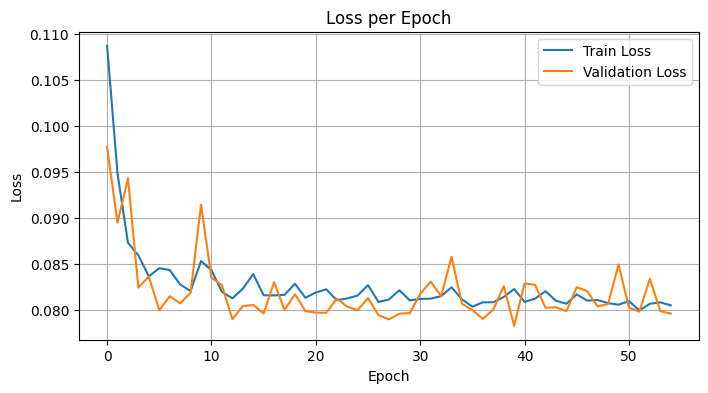

In [7]:
LossHistory(h)

In [8]:
# Evaluate model performance on test set
y_pred_prob_test = model.predict(X_test)
y_pred_test = (y_pred_prob_test > 0.5).astype(int)

print(classification_report(y_test, y_pred_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9149
           1       1.00      0.69      0.82       850

    accuracy                           0.97      9999
   macro avg       0.98      0.85      0.90      9999
weighted avg       0.97      0.97      0.97      9999



In [9]:
# Evaluate model performance on train set
y_pred_prob_train = model.predict(X_train)
y_pred_train = (y_pred_prob_train > 0.5).astype(int)

print(classification_report(y_train, y_pred_train))

2812/2812 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     82333
           1       0.99      0.68      0.81      7650

    accuracy                           0.97     89983
   macro avg       0.98      0.84      0.90     89983
weighted avg       0.97      0.97      0.97     89983



In [10]:
train_accuracy=accuracy_score(y_train, y_pred_train)
print("Train accuracy:" , train_accuracy)

Train accuracy: 0.9727392952002045


In [11]:
test_accuracy=accuracy_score(y_test, y_pred_test)
print("Test accuracy:" , test_accuracy)

Test accuracy: 0.9734973497349735


In [12]:
# Generate confusion matrix to evaluate classification results
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[9147,    2],
       [ 263,  587]])

In [13]:
# Compute ROC curve and AUC score for model evaluation
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)
auc_score = roc_auc_score(y_test, y_pred_prob_test)

print("AUC Score:", auc_score)

AUC Score: 0.9776244269704821


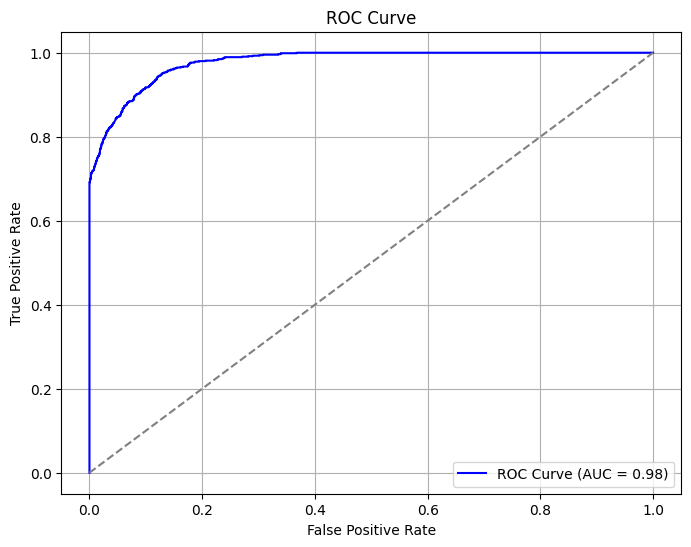

In [14]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()